In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nibabel as nib
import cv2 as cv
import os


In [5]:
diretorio_atual = os.getcwd()
diretorio_imgs = os.path.join(diretorio_atual,'Dataset_Padronizado')
diretorio_final =  os.path.join(diretorio_atual,'Imagens Reduzidas')

In [2]:
os.mkdir('Imagens Reduzidas')

In [6]:
list_img = os.listdir(diretorio_imgs)

In [7]:
list_img

['Patient 1352.nii',
 'Patient 785.nii',
 'Patient 1384.nii',
 'Patient 160.nii',
 'Patient 1309.nii',
 'Patient 1203.nii',
 'Patient 293.nii',
 'Patient 312.nii',
 'Patient 1361.nii',
 'Patient 1349.nii',
 'Patient 215.nii',
 'Patient 1402.nii',
 'Patient 811.nii',
 'Patient 1215.nii',
 'Patient 11.nii',
 'Patient 347.nii',
 'Patient 781.nii',
 'Patient 106.nii',
 'Patient 280.nii',
 'Patient 51.nii',
 'Patient 780.nii',
 'Patient 1253.nii',
 'Patient 1336.nii',
 'Patient 46.nii',
 'Patient 281.nii',
 'Patient 1357.nii',
 'Patient 1181.nii',
 'Patient 1285.nii',
 'Patient 1381.nii',
 'Patient 1250.nii',
 'Patient 1341.nii',
 'Patient 1273.nii',
 'Patient 227.nii',
 'Patient 239.nii',
 'Patient 1375.nii',
 'Patient 1308.nii',
 'Patient 1209.nii',
 'Patient 1199.nii',
 'Patient 816.nii',
 'Patient 3.nii',
 'Patient 782.nii',
 'Patient 225.nii',
 'Patient 254.nii',
 'Patient 235.nii',
 'Patient 1322.nii',
 'Patient 230.nii',
 'Patient 416.nii',
 'Patient 1220.nii',
 'Patient 282.nii',
 '

In [74]:
nomes = []
for arq in list_img:
    pat = arq[:-4]
    nomes.append(pat)

In [76]:
nomes

['Patient 1352',
 'Patient 785',
 'Patient 1384',
 'Patient 160',
 'Patient 1309',
 'Patient 1203',
 'Patient 293',
 'Patient 312',
 'Patient 1361',
 'Patient 1349',
 'Patient 215',
 'Patient 1402',
 'Patient 811',
 'Patient 1215',
 'Patient 11',
 'Patient 347',
 'Patient 781',
 'Patient 106',
 'Patient 280',
 'Patient 51',
 'Patient 780',
 'Patient 1253',
 'Patient 1336',
 'Patient 46',
 'Patient 281',
 'Patient 1357',
 'Patient 1181',
 'Patient 1285',
 'Patient 1381',
 'Patient 1250',
 'Patient 1341',
 'Patient 1273',
 'Patient 227',
 'Patient 239',
 'Patient 1375',
 'Patient 1308',
 'Patient 1209',
 'Patient 1199',
 'Patient 816',
 'Patient 3',
 'Patient 782',
 'Patient 225',
 'Patient 254',
 'Patient 235',
 'Patient 1322',
 'Patient 230',
 'Patient 416',
 'Patient 1220',
 'Patient 282',
 'Patient 161',
 'Patient 1334',
 'Patient 793',
 'Patient 88',
 'Patient 1232',
 'Patient 65',
 'Patient 405',
 'Patient 93',
 'Patient 1298',
 'Patient 266',
 'Patient 1519',
 'Patient 18',
 'Pati

In [77]:
list_img

['Patient 1352.nii',
 'Patient 785.nii',
 'Patient 1384.nii',
 'Patient 160.nii',
 'Patient 1309.nii',
 'Patient 1203.nii',
 'Patient 293.nii',
 'Patient 312.nii',
 'Patient 1361.nii',
 'Patient 1349.nii',
 'Patient 215.nii',
 'Patient 1402.nii',
 'Patient 811.nii',
 'Patient 1215.nii',
 'Patient 11.nii',
 'Patient 347.nii',
 'Patient 781.nii',
 'Patient 106.nii',
 'Patient 280.nii',
 'Patient 51.nii',
 'Patient 780.nii',
 'Patient 1253.nii',
 'Patient 1336.nii',
 'Patient 46.nii',
 'Patient 281.nii',
 'Patient 1357.nii',
 'Patient 1181.nii',
 'Patient 1285.nii',
 'Patient 1381.nii',
 'Patient 1250.nii',
 'Patient 1341.nii',
 'Patient 1273.nii',
 'Patient 227.nii',
 'Patient 239.nii',
 'Patient 1375.nii',
 'Patient 1308.nii',
 'Patient 1209.nii',
 'Patient 1199.nii',
 'Patient 816.nii',
 'Patient 3.nii',
 'Patient 782.nii',
 'Patient 225.nii',
 'Patient 254.nii',
 'Patient 235.nii',
 'Patient 1322.nii',
 'Patient 230.nii',
 'Patient 416.nii',
 'Patient 1220.nii',
 'Patient 282.nii',
 '

In [55]:
arq = nib.load(os.path.join(diretorio_imgs,tomografia)).get_fdata()

In [71]:
def redimensiona(arq):

    img_inicial = arq[0]
    ct = cv.resize(img_inicial,(256,256))
    ct = np.reshape(ct,(1,256,256,1))

    for img in arq[1:]:
        fatia = cv.resize(img,(256,256))
        fatia = np.reshape(fatia,(1,256,256,1))
        
        ct = np.vstack((ct,fatia))
    
    return ct

In [87]:
list_path = []
for nome, file in zip (nomes,list_img):
    path = os.path.join(diretorio_final,nome)
    list_path.append(path)
    
    arq = nib.load(os.path.join(diretorio_imgs,file)).get_fdata()
    img_final = redimensiona(arq)
    
    ct = nib.Nifti1Image(img_final,affine=None)
    nib.save(ct,path)

In [91]:
teste = nib.load(os.path.join(diretorio_final,list_path[27]+'.nii')).get_fdata()

In [96]:
fatia = teste[145,:,:,0]

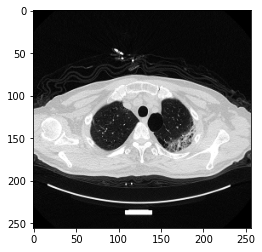

In [97]:
plt.imshow(fatia,cmap='gray')

In [117]:
df = pd.read_csv('metadados_padronizados')

In [118]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Caminho,Qt_fatias,Caminho_padronizado
0,0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,7,7,10,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,9,9,12,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,10,10,14,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,706,706,1187,HUST-Liyuan Hospital,Patient 817,59,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,264,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
405,707,707,1188,HUST-Liyuan Hospital,Patient 818,51,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,258,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
406,708,708,1190,HUST-Liyuan Hospital,Patient 820,64,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,270,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
407,709,709,1193,HUST-Liyuan Hospital,Patient 823,31,Female,Positive,Negative,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,252,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [119]:
adiciona_caminho = {paciente:path+'.nii' for paciente, path in zip(nomes,list_path)}

In [120]:
adiciona_caminho

{'Patient 1352': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 1352.nii',
 'Patient 785': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 785.nii',
 'Patient 1384': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 1384.nii',
 'Patient 160': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 160.nii',
 'Patient 1309': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 1309.nii',
 'Patient 1203': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 1203.nii',
 'Patient 293': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 293.nii',
 'Patient 312': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 312.nii',
 'Patient 1361': '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 1361.nii',
 'Patient 1349': '/home/icaro/Faculdade/Avaliacao_de_g

In [121]:
df['Caminho_Reduzido'] = df['Patient'].map(adiciona_caminho)

In [122]:
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Caminho,Qt_fatias,Caminho_padronizado,Caminho_Reduzido
0,0,0,0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,2,2,2,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,7,7,10,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,9,9,12,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,10,10,14,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,706,706,1187,HUST-Liyuan Hospital,Patient 817,59,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,264,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
405,707,707,1188,HUST-Liyuan Hospital,Patient 818,51,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,258,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
406,708,708,1190,HUST-Liyuan Hospital,Patient 820,64,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,270,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
407,709,709,1193,HUST-Liyuan Hospital,Patient 823,31,Female,Positive,Negative,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,252,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [123]:
df.iloc[0].values

array([0, 0, 0, 'HUST-Union Hospital', 'Patient 1', 81, 'Male',
       'Positive', 'Positive', 'Regula/Mild', 'Cured',
       '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset/Patient 1.nii',
       181,
       '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Dataset_Padronizado/Patient 1.nii',
       '/home/icaro/Faculdade/Avaliacao_de_gravidade_COVID/Imagens Reduzidas/Patient 1.nii'],
      dtype=object)

In [124]:
df =  df[['Hospital','Patient','Age','Gender','SARS-CoV-2 nucleic acids','CT','Morbidity','Mortality','Caminho','Qt_fatias','Caminho_padronizado','Caminho_Reduzido']]

In [125]:
df

,Hospital,Patient,Age,Gender,SARS-CoV-2 nucleic acids,CT,Morbidity,Mortality,Caminho,Qt_fatias,Caminho_padronizado,Caminho_Reduzido
0,HUST-Union Hospital,Patient 1,81,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,181,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
1,HUST-Union Hospital,Patient 3,65,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,405,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
2,HUST-Union Hospital,Patient 11,39,Male,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,308,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
3,HUST-Union Hospital,Patient 13,67,Female,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
4,HUST-Union Hospital,Patient 15,53,Male,Positive,Positive,Severe/Critically ill,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,419,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
...,...,...,...,...,...,...,...,...,...,...,...,...
404,HUST-Liyuan Hospital,Patient 817,59,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,264,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
405,HUST-Liyuan Hospital,Patient 818,51,Male,Positive,Positive,Regula/Mild,Unknown,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,258,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
406,HUST-Liyuan Hospital,Patient 820,64,Female,Positive,Positive,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,270,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...
407,HUST-Liyuan Hospital,Patient 823,31,Female,Positive,Negative,Regula/Mild,Cured,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,252,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...,/home/icaro/Faculdade/Avaliacao_de_gravidade_C...


In [126]:
df.to_csv('metadados_redimensionados')